In [1]:
# create model class
import torch
import torch.nn as nn

class Model(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(num_features, 3),
        nn.ReLU(),
        nn.Linear(3, 1),
        nn.Sigmoid()
    )

  def forward(self, features):

    out = self.network(features)

    return out

In [12]:
features = torch.rand(10,5)
features[0].shape


torch.Size([5])

In [5]:
# create dataset
features = torch.rand(10,5)

# create model
model = Model(features.shape[1])

# call model for forward pass
# model.forward(features)
model(features)

tensor([[0.5457],
        [0.5463],
        [0.5718],
        [0.5488],
        [0.5727],
        [0.5543],
        [0.5576],
        [0.5826],
        [0.5550],
        [0.5651]], grad_fn=<SigmoidBackward0>)

In [8]:
!pip install torchinfo

In [9]:
from torchinfo import summary

summary(model, input_size=(10, 5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Sequential: 1-1                        [10, 1]                   --
│    └─Linear: 2-1                       [10, 3]                   18
│    └─ReLU: 2-2                         [10, 3]                   --
│    └─Linear: 2-3                       [10, 1]                   4
│    └─Sigmoid: 2-4                      [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

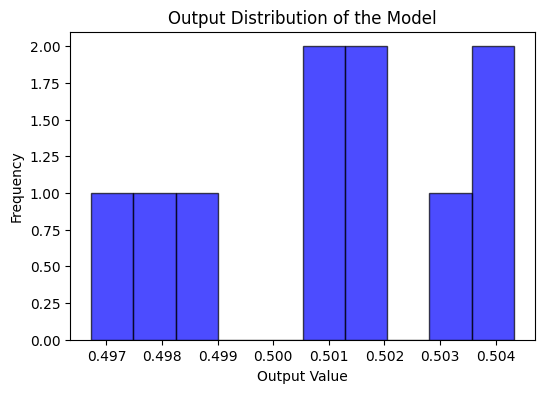

In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the model class
class Model(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features, 3),
            nn.ReLU(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

    def forward(self, features):
        return self.network(features)

# Create dataset
features = torch.rand(10, 5)

# Create model
model = Model(features.shape[1])

# Forward pass
output = model(features).detach().numpy()

# Visualize output distribution
plt.figure(figsize=(6, 4))
plt.hist(output, bins=10, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Output Value")
plt.ylabel("Frequency")
plt.title("Output Distribution of the Model")
plt.show()
